#**다중 분류**

다중 분류는 각 클래스에 대한 확률값을 출력한다.   
> 예를 들어 첫 번째 클래스에 대한 확률은 $ŷ_1$,   
 두 번째 클래스에 대한 확률은 $ŷ_2$,   
 세 번째 클래스에 대한 확률은 $ŷ_3$

다중 분류 신경망은 출력층에 분류할 클래스의 개수만큼 뉴런을 배치한다.
(ex> 분류 항목이 3 개면 출력층 뉴런이 3 개)

#**Softmax Function: 소프트맥스 함수**

출력층의 출력 강도를 정규화하는 함수   
출력 강도를 정규화한다는 것은 '모든 출력값의 합을 1로 만든다'는 의미이다.   
###$$
  Softmax\_func = \frac{𝑒^{z_i}}{𝑒^{z_1} + 𝑒^{z_2} + 𝑒^{z_3}}
$$
출력이 늘어나는 만큼 지수 함수가 늘어난다.   
ex> 두 번째 클래스에 대한 소프트맥스 함수 = $\frac{𝑒^{z_2}}{𝑒^{z_1} + 𝑒^{z_2} + 𝑒^{z_3}}$

#**Cross Entropy: 크로스 엔트로피 손실함수**

**'크로스 엔트로피 손실함수'**는 다중 분류에서 사용하는 손실함수   
####**'로지스틱 손실함수의 일반화 버전'**
>로지스틱 손실함수가 크로스 엔트로피 손실함수의 이진분류 버전이기 때문이다.

###$$
  L = -\displaystyle\sum_{c=1}^{c}y_clog(a_c) = -(y_1log(a_1) + y_2log(a_2) + … + y_clog(a_c))
   = -1 × log(a_{y = 1})
$$

c 값은 전체 클래스 개수를 의미한다.    
$a_{y=1}$는 정답 클래스에 해당하는 활성화 출력이다.

#**크로스 엔트로피 손실함수 미분**

경사하강법을 적용하기 위해 미분을 해보자.

###**$z_1$에 대하여 미분**
###$$
  \frac{∂L}{∂z_1} = \frac{∂L}{∂a_1}\frac{∂a_1}{∂z_1} + \frac{∂L}{∂a_2}\frac{∂a_2}{∂z_1} + \frac{∂L}{∂a_3}\frac{∂a_3}{∂z_1}
$$
<br>

하나씩 순서대로 미분을 진행해보자.

###$$
  \frac{∂L}{∂a_1} = -\frac{∂}{∂a_1}(y_1log\,a_1 + y_2log\,a_2 + y_3log\,a_3)
  = -\frac{y_1}{a_1}
 $$
<br>
 
$a_1$에 관한식 $y_1log\,a_1$만 남아 미분된다.   
마찬가지 방법으로 $a_2,\, a_3$도 미분해보자.

###$$
  \frac{∂L}{∂a_2} = -\frac{y_2}{a_2} \quad\quad \frac{∂L}{∂a_3} = -\frac{y_3}{a_3}
 $$
<br>

이 식을 $\frac{∂L}{∂z_1}$에 대입하면,

###$$
  \frac{∂L}{∂z_1} = (-\frac{y_1}{a_1})\frac{∂a_1}{∂z_1} + (-\frac{y_2}{a_2})\frac{∂a_2}{∂z_1} + (-\frac{y_3}{a_3})\frac{∂a_3}{∂z_1}
$$
<br>
<br>
<br>
<br>
<br>
<br>

##머 여차저차 하여 식을 쭈루루룩 두비두밥 두밥바 두구두구 짠짠 $z_1$송송 미분탁 하면

###$$
  \frac{∂L}{∂z} = -(𝒚 - 𝐚)
$$

로지스틱 손실함수와 정확히 일치한다.

따라서 크로스 엔트로피 손실함수를 역전파에 사용하기 위해 따로 코드를 수정할 필요는 없다.   

이제 직접 MultiClassNetwork 클래스를 구현해보자.

In [ ]:
# import dependencies

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt


# divid samples into train, val, test sets

cancer = load_breast_cancer()
c_data = cancer.data
c_target = cancer.target
train_data_all, test_data, train_target_all, test_target = train_test_split(c_data, c_target, stratify=c_target, test_size=0.2, random_state=42)
train_data, val_data, train_target, val_target = train_test_split(train_data_all, train_target_all, stratify=train_target_all, test_size=0.2, random_state=42)
print(train_data.shape, val_data.shape)


from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(train_data)  # train_data를 넣어 fit()하여 변환 규칙을 익히고
train_data_scaled = scaler.transform(train_data)  # 표준화 전처리
val_data_scaled = scaler.transform(val_data)


class SingleLayer:

  def __init__(self, learning_rate=0.1, l1=0, l2=0):
    self.w = None   # 입력데이터의 특성이 많아 가중치와 절편을 미리 초기화하지 않는다.
    self.b = None   # 나중에 입력데이터를 보고 특성 개수에 맞게 결정
    self.losses = []
    self.w_history = []   # 가중치를 저장할 리스트
    self.lr = learning_rate   # 학습률 
    self.val_losses = []    # 검증세트 손실을 기록할 리스트
    self.l1 = l1
    self.l2 = l2

  def forpass(self, x):
    z = np.dot(x, self.w) + self.b   # x=(364, 30) dot w=(30, 1) = z=(364, 1)
    return z


  def backprop(self, x, err):   # 오차역전파 메서드
    m = len(x)
    w_grad = np.dot(x.T, err) / m # x.T=(364, 30) dot err=(30, 1) = w_grad=(364, 1)
    b_grad = np.sum(err) / m  # err/m = (364, 1)
    return w_grad, b_grad


  def fit(self, x, y, epochs=100, x_val=None, y_val=None):  # 검증세트를 전달받을 x_val, y_val 추가
    y = y.reshape(-1, 1)  # 타깃을 열벡터로 바꾼다.
    y_val = y_val.reshape(-1, 1)  # 검증타깃을 열벡터로 바꾼다.
    m = len(x)
    self.w = np.ones((x.shape[1], 1))  # 가중치와 절편 초기화
    self.b = 0
    self.w_history.append(self.w.copy())  # 가중치 기록 -> 넘파이 배열(w)을 추가하면 실제값이 추가되는 것이 아닌 배열을 참조하기 때문에 w값이 바뀌면 그 값을 복사하여 추가해주어야 한다.
    np.random.seed(42)
    for i in range(epochs):
      z = self.forpass(x)   # 정방향 계산
      a = self.activation(z)  # 정방향 계산의 결과값인 z를 활성화 함수에 통과
      err =  -(y - a)       # 활성화 함수를 거친 a값으로 오차량 계산
      w_grad, b_grad = self.backprop(x, err)  # 오차역전파
      w_grad += (self.l1 * np.sign(self.w) + self.l2 * self.w) / m # 그레이디언트에서 패널티 항의 미분값을 더한다.
      self.w -= self.lr * w_grad   # 그레이디언트 업데이트  (학습률 적용)
      self.b -= self.lr * b_grad
      self.w_history.append(self.w.copy())  # 가중치 기록
      a = np.clip(a, 1e-10, 1-1e-10)
      loss = np.sum(-(y * np.log(a) + (1 - y) * np.log(1 - a)))  # 로지스틱 손실함수 -(ylog(a) - (1 - y)log(1 - a))
      self.losses.append((loss + self.reg_loss()) / m)
      self.update_val_loss(x_val, y_val)  # 검증세트 손실을 업데이트하는 메서드 호출


  def reg_loss(self):
    return self.l1 * np.sum(np.abs(self.w)) + self.l2 / 2 * np.sum(self.w**2)

  
  def update_val_loss(self, x_val, y_val):
    z = self.forpass(x_val)
    a = self.activation(z)
    a = np.clip(a, 1e-10, 1-1e-10)
    val_loss = np.sum(-(y_val * np.log(a) + (1 - y_val) * np.log(1 - a)))
    self.val_losses.append((val_loss + self.reg_loss()) / len(y_val))


  def activation(self, z):  # 활성화 함수
    z = np.clip(z, -100, None)    # 안전한 계산을 위해 클리핑
    a = 1 / (1 + np.exp(-z))
    return a


  def predict(self, x): # 예측 함수
    z = self.forpass(x)
    return z > 0  # 계단함수


  def score(self, x, y):    # 평가함수
    return np.mean(self.predict(x) == y.reshape(-1, 1))


class DualLayer(SingleLayer):

  def __init__(self, units=10, learning_rate=0.1, l1=0, l2=0):
    self.units = units  # 은닉층 유닛 개수
    self.w1 = None      # 은닉층의 가중치
    self.b1 = None      # 은닉층의 절편
    self.w2 = None      # 출력층의 가중치
    self.b2 = None      # 출력층의 절편
    self.a1 = None      # 은닉층의 활성화 출력
    self.losses = []    # 훈련 손실
    self.val_losses = []  # 검증 손실
    self.lr = learning_rate # 학습률
    self.l1 = l1    # L1 손실 파라미터
    self.l2 = l2    # L2 손실 파라미터

  
  def forpass(self, x):
    z1 = np.dot(x, self.w1) + self.b1
    self.a1 = self.activation(z1)
    z2 = np.dot(self.a1, self.w2) + self.b2
    return z2

  
  def backprop(self, x, err):
    m = len(x)
    w2_grad = np.dot(self.a1.T, err) / m  # 출력층 그레이디언트
    b2_grad = np.sum(err) / m
    err_to_hidden = np.dot(err, self.w2.T) * self.a1 * (1 - self.a1)  # 시그모이드 함수까지 그레이디언트 계산
    w1_grad = np.dot(x.T, err_to_hidden) / m
    b1_grad = np.sum(err_to_hidden, axis=0) / m
    return w1_grad, b1_grad, w2_grad, b2_grad


  def init_weights(self, n_features):
    self.w1 = np.ones((n_features, self.units))   # 가중치 행렬 초기화 (특성개수, 뉴런 개수(은닉층 크기))
    self.b1 = np.zeros(self.units)  # 뉴런 개수(은닉층 크기)
    self.w2 = np.ones((self.units, 1))  # (뉴런 개수(은닉층 크기), 1)
    self.b2 = 0

  
  def fit(self, x, y, epochs=100, x_val=None, y_val=None):
    y = y.reshape(-1, 1)
    y_val = y_val.reshape(-1, 1)
    m = len(x)
    self.init_weights(x.shape[1])
    for i in range(epochs):
      a = self.training(x, y, m)
      a = np.clip(a, 1e-10, 1-1e-10)
      loss = np.sum(-(y * np.log(a) + (1 - y) * np.log(1 - a)))
      self.losses.append((loss + self.reg_loss()) / m)
      self.update_val_loss(x_val, y_val)

  
  def training(self, x, y, m):
    z = self.forpass(x)
    a = self.activation(z)
    err = -(y - a)
    w1_grad, b1_grad, w2_grad, b2_grad = self.backprop(x, err)
    w1_grad += (self.l1 * np.sign(self.w1) + self.l2 * self.w1) / m
    w2_grad += (self.l1 * np.sign(self.w2) + self.l2 * self.w2) / m
    self.w1 -= self.lr * w1_grad
    self.b1 -= self.lr * b1_grad
    self.w2 -= self.lr * w2_grad
    self.b2 -= self.lr * b2_grad
    return a


  def reg_loss(self):
    return self.l1 * (np.sum(np.abs(self.w1)) + np.sum(np.abs(self.w2))) + \
            self.l2 / 2 *(np.sum(self.w1**2) + np.sum(self.w2**2))


class RandomInitNetwork(DualLayer):

  def init_weights(self, n_features):
    np.random.seed(42)
    self.w1 = np.random.normal(0, 1, (n_features, self.units))  # np.random.normal(평균, 표준편차, 배열크기)
    self.b1 = np.zeros(self.units)
    self.w2 = np.random.normal(0, 1, (self.units, 1))
    self.b2 = 0


class MiniBatchNetwork(RandomInitNetwork):

  def __init__(self, units=10, batch_size=32, learning_rate=0.1, l1=0, l2=0):
    super().__init__(units, learning_rate, l1, l2)
    self.batch_size = batch_size

  
  def fit(self, x, y, epochs=100, x_val=None, y_val=None):
    y_val = y_val.reshape(-1, 1)
    self.init_weights(x.shape[1])
    np.random.seed(42)
    for i in range(epochs):
      loss = 0
      for x_batch, y_batch in self.gen_batch(x, y):
        y_batch = y_batch.reshape(-1, 1)
        m = len(x_batch)
        a = self.training(x_batch, y_batch, m)
        a = np.clip(a, 1e-10, 1-1e-10)
        loss += np.sum(-(y_batch * np.log(a) + (1 - y_batch) * np.log(1 - a)))
      self.losses.append((loss + self.reg_loss()) / len(x))
      self.update_val_loss(x_val, y_val)


  def gen_batch(self, x, y):
    length = len(x)
    bins = length // self.batch_size
    if length % self.batch_size:
      bins += 1
    indexes = np.random.permutation(np.arange(len(x)))
    x = x[indexes]
    y = y[indexes]
    for i in range(bins):
      start = self.batch_size * i
      end = self.batch_size * (i + 1)
      yield x[start:end], y[start:end]

(364, 30) (91, 30)


#**MultiClassNetwork 클래스 만들기**

1. 소프트맥스 함수 추가하기
>activation() 메서드 이름을 sigmoid()로 바꾸고, softmax() 메서드를 추가한다.

<br><br>

##**다중 분류 신경망 flow**
1. 은닉층 유닛 개수, 배치 사이즈, 학습률, 규제값을 입력받아 객체 생성
2. 데이터 샘플과 타깃, 에포크, 검증 샘플과 타깃을 입력받아 fit
3. 데이터 샘플(입력 샘플 개수)와 타깃(분류될 클래스 개수)를 바탕으로 가중치 초기화(init_weights)
4. 에포크만큼 배치를 생성(gen_batch)하여 training
  1. 데이터 샘플 배열 $𝑋$로 정방향 계산
    1. 은닉층 계산 $𝑍_1 = 𝑋𝑊_1 + 𝑏_1$ 
    ```
    z1 = np.dot(x, self.w1) + self.b1
    ```
    2. 은닉층 정방향 출력값 z1을 시그모이드 함수에 적용
    ```
    a1 =  self.sigmoid(z1)
    ```
    3. 출력층 계산 $𝑍_2 = 𝐴_1𝑊_2 + 𝑏_2$
    ```
    z2 = np.dot(self.a1, self.w2) + self.b2
    ```
  2. 출력층 결과값 z2를 소프트맥스 함수에 적용
    $softmax = \frac{𝑒^{zi}}{𝑒^{z1} + 𝑒^{z2} + 𝑒^{z3}}$
    ```
    a = exp_z / np.sum(exp_z, axis=1).reshape(-1, 1)
    ```
  3. 오차량 계산 
  ```
    err = -(y - a)
  ```
  4. 데이터 샘플과 오차량을 이용해 역방향 계산
    1. 출력층 가중치 그레이디언트(w2_grad) 계산$\quad𝐴_1^𝑇(-(𝑌 - 𝐴_2))$   
    ($𝐴_1^𝑇(-(𝑌 - 𝐴_2))$는 모든 샘플에 대한 가중치 그레이디언트이므로, 전체 샘플의 수로 나누어줘야 함)
    ```
      w2_grad = np.dot(self.a1.T, err) / len(x)
    ```
    2. 출력층 절편 그레이디언트(b2_grad) 계산 $\quad 𝟏^𝑇(-(𝑌 - 𝐴_2))$
    ```
      b2_grad = (np.sum(err)) / len(x)
    ```
    3. 은닉층 그레이디언트 계산을 위해 은닉층 오차량(err_to_hidden) 계산   
      $(-(𝑌 - 𝐴_2)𝑊_2^𝑇⊙𝐴_1⊙(1 - 𝐴_1)) \quad ※-(𝑌 - 𝐴_2) =$ err
      ```
        err_to_hidden = np.dot(err, self.w2) * self.a1 * (1 - self.a1)
      ```
    4. 은닉층 가중치 그레이디언트 계산   
      

In [ ]:
# MultiClassNetwork class

class MultiClassNetwork:

  def __init__(self, units=10, batch_size=32, learning_rate=0.1, l1=0, l2=0):
    self.units = units  # 은닉층 개수
    self.w1 = None      # 은닉층 가중치
    self.b1 = None      # 은닉층 절편
    self.w2 = None      # 출력층 가중치
    self.b2 = None      # 출력층 절편
    self.a1 = None      # 은닉층 활성화 출력
    self.losses = []    # 훈련세트 손실 리스트
    self.val_losses = []  # 검증세트 손실 리스트
    self.lr = learning_rate  # 학습률
    self.l1 = l1  # L1 규제값
    self.l2 = l2  # L2 규제값
    self.batch_size = batch_size  # 배치 사이즈


  def init_weights(self, n_features, n_classes):  # 가중치 초기화
    self.w1 = np.random.normal(0, 1, (n_features, self.units))  # (입력 특성 개수, 은닉층 유닛 개수)
    self.b1 = np.zeros(self.units)  # 은닉층 유닛 개수
    self.w2 = np.random.normal(0, 1, (self.units, n_classes)) # (은닉층 유닛 개수, 분류 클래스 개수(출력층 유닛))
    self.b2 = np.zeros(n_classes) # 분류 클래스 개수(출력층 유닛)


  def forpass(self, x):   # 정방향 계산
    z1 = np.dot(x, self.w1) + self.b1   # z1 = XW + B (은닉층 계산)
    self.a1 = self.sigmoid(z1)          # 시그모이드 함수 통과
    z2 = np.dot(self.a1, self.w2) + self.b2   # z2 = AW + B (출력층 계산)
    return z2

  
  def backprop(self, x, err): # 역방향 계산
    m = len(x)
    w2_grad = np.dot(self.a1.T, err) / m  # 출력층 가중치 그레이디언트  A1.T(-(Y - A2)) --> (-(Y - A2)) = err
    b2_grad = np.sum(err) / m     
    err_to_hidden = np.dot(err, self.w2.T) * self.a1 * (1 - self.a1)  # 은닉층 손실함수 미분 오차량 -(Y - A2)W2.T * A1 * (1 - A1)
    w1_grad = np.dot(x.T, err_to_hidden) / m      # 은닉층 가중치 그레이디언트 X.T(err) / m
    b1_grad = np.sum(err_to_hidden, axis=0) / m
    return w1_grad, b1_grad, w2_grad, b2_grad


  def fit(self, x, y, epochs=100, x_val=None, y_val=None):  # 피팅 함수
    np.random.seed(42)  
    self.init_weights(x.shape[1], y.shape[1])   # 가중치 초기화(특성, 분류 클래스 개수)
    for i in range(epochs):
      loss = 0
      print('.', end=' ')
      for x_batch, y_batch in self.gen_batch(x, y):   # 배치만큼 반복
        a = self.training(x_batch, y_batch)
        a = np.clip(a, 1e-10, 1-1e-10)
        loss += np.sum(-y_batch * np.log(a))
      self.losses.append((loss + self.reg_loss()) / len(x))
      self.update_val_loss(x_val, y_val)


  def gen_batch(self, x, y):
    length = len(x)
    bins = length // self.batch_size
    if length % self.batch_size:
      bins += 1
    indexes = np.random.permutation(np.arange(len(x)))
    x = x[indexes]
    y = y[indexes]
    for i in range(bins):
      start = self.batch_size * i
      end = self.batch_size * (i + 1)
      yield x[start:end], y[start:end]


  def sigmoid(self, z):
    z = np.clip(z, -100, None)
    a = 1 / (1 + np.exp(-z))
    return a


  def training(self, x, y):   # 훈련 함수
    m = len(x)  
    z = self.forpass(x)   # 정방향 계산 (출력층 z)
    a = self.softmax(z)   # 소프트맥스  (출력층 결과값 정규화)
    err = -(y - a)        # 크로스엔트로피 손실함수 미분을 위한 오차량 계산
    w1_grad, b1_grad, w2_grad, b2_grad = self.backprop(x, err)  # 역방향 계산
    w1_grad += (self.l1 * np.sign(self.w1) + self.l2 * self.w1) / m   # 은닉층 규제 적용
    w2_grad += (self.l1 * np.sign(self.w2) + self.l2 * self.w2) / m   # 출력층 규제 적용
    self.w1 -= self.lr * w1_grad
    self.b1 -= self.lr * b1_grad
    self.w2 -= self.lr * w2_grad
    self.b2 -= self.lr * b2_grad
    return a


  def softmax(self, z):
    z = np.clip(z, -100, None)
    exp_z = np.exp(z)
    return exp_z / np.sum(exp_z, axis=1).reshape(-1, 1)


  def predict(self, x):
    z = self.forpass(x)
    return np.argmax(z, axis=1)


  def score(self, x, y):
    return np.mean(self.predict(x) == np.argmax(y, axis=1))


  def reg_loss(self):
    return self.l1 * (np.sum(abs(self.w1))) + np.sum(np.abs(self.w2)) + self.l2 / 2 * np.sum(self.w1**2) + np.sum(self.w2**2) # 규제 손실

  
  def update_val_loss(self, x_val, y_val):
    z = self.forpass(x_val)
    a = self.softmax(z)
    a = np.clip(a, 1e-10, 1-1e-10)
    val_loss = np.sum(-y_val * np.log(a))
    self.val_losses.append((val_loss + self.reg_loss()) / len(y_val))

#**의류 이미지 분류**

패션 MNIST 데이터셋을 이용해 의류를 분류해보자.

In [ ]:
!pip install tensorflow_gpu==2.0.0  # 탠서플로 최신버전 설지

In [ ]:
import tensorflow as tf
tf.__version__

'2.0.0'

In [ ]:
(train_data_all, train_target_all), (test_data, test_target) = tf.keras.datasets.fashion_mnist.load_data()
'''
  load_data()는 훈련세트와 테스트세트를 튜플로 묶어 반환한다.
  여기서 우리는 훈련세트만 사용한다.
  테스트세트를 사용해 모델을 반복적으로 평가하면 실전에 투입했을 때 성능을 낙관적으로 예측할 수 있기 때문이다.
'''

'\n  load_data()는 훈련세트와 테스트세트를 튜플로 묶어 반환한다.\n  여기서 우리는 훈련세트만 사용한다.\n  테스트세트를 사용해 모델을 반복적으로 평가하면 실전에 투입했을 때 성능을 낙관적으로 예측할 수 있기 때문이다.\n'

In [ ]:
print(train_data_all.shape, train_target_all.shape)
'''
  각 샘플은 높이와 너비가 있는 2차원 흑백 이미지이고,
  train_data_all은 2차원 이미지 데이터를 모아놓은 세트이기 때문에 3차원 배열이다.
  28 X 28 사이즈의 이미지 60000장이 쌓여 있는 형태이다.
'''

(60000, 28, 28) (60000,)


'\n  각 샘플은 높이와 너비가 있는 2차원 흑백 이미지이고,\n  train_data_all은 2차원 이미지 데이터를 모아놓은 세트이기 때문에 3차원 배열이다.\n  28 X 28 사이즈의 이미지 60000장이 쌓여 있는 형태이다.\n'

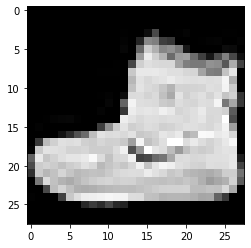

'\n  imshow() 함수는 넘파이 배열을 입력 받아 이미지를 그린다.\n  matplotlib은 컬러맵(colormap)을 사용해 이미지를 그리고 cmap 파라미터로 설정할 수 있다.\n  넘파이 배열 원소값이 0에 가까울수록 검은색이다.\n'

In [ ]:
plt.imshow(train_data_all[0], cmap='gray')
plt.show()
'''
  imshow() 함수는 넘파이 배열을 입력 받아 이미지를 그린다.
  matplotlib은 컬러맵(colormap)을 사용해 이미지를 그리고 cmap 파라미터로 설정할 수 있다.
  넘파이 배열 원소값이 0에 가까울수록 검은색이다.
'''

In [ ]:
print(train_target_all[:10])
class_names = ['티셔츠/윗도리', '바지', '스웨터', '드레스', '코트', '샌들', '셔츠', '스니커즈', '가방', '앵클부츠']
print(class_names[train_target_all[3]])

np.bincount(train_target_all) # 타깃 분포 -> 각 레이블당 6000개 씩 총 60000개

[9 0 0 3 0 2 7 2 5 5]
드레스


array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000])

In [ ]:
# 훈련세트 검증세트 분할

train_data, val_data, train_target, val_target = train_test_split(train_data_all, train_target_all, stratify=train_target_all, test_size=0.2, random_state=42)

print(np.bincount(train_target))
print(np.bincount(val_target))

[4800 4800 4800 4800 4800 4800 4800 4800 4800 4800]
[1200 1200 1200 1200 1200 1200 1200 1200 1200 1200]


In [ ]:
# 입력 데이터 표준화

train_data = train_data / 255
val_data = val_data / 255

'''
  평균을 0, 분산을 1로 맞추는 것을 '표준화'라고 배웠다.
  여기서는 이미지의 RGB값이 0~255 이므로 각 픽셀을 255로 나누어주어
  0~1 사이 값으로 맞췄다.
  엄밀히 '표준화'라고 말할 수는 없지만, 실전에서 잘 작동하므로 이 방법을 많이 사용한다.
'''

"\n  평균을 0, 분산을 1로 맞추는 것을 '표준화'라고 배웠다.\n  여기서는 이미지의 RGB값이 0~255 이므로 각 픽셀을 255로 나누어주어\n  0~1 사이 값으로 맞췄다.\n  엄밀히 '표준화'라고 말할 수는 없지만, 실전에서 잘 작동하므로 이 방법을 많이 사용한다.\n"

In [ ]:
# 훈련/검증세트 차원 변경

train_data = train_data.reshape(-1, 784)
val_data = val_data.reshape(-1, 784)

'''
  MultiClassNetwork 클래스는 1차원 배열 샘플을 입력받지만 준비한 데이터셋은 28x28 크기의 2차원 배열이다.
  따라서 reshape을 통해 샘플의 두 번째, 세 번째 차원을 합친 784(28 * 28)의 길이로 펼친다.
'''

print(train_data.shape, val_data.shape)

(48000, 784) (12000, 784)


패션 MNIST 데이터셋은 10개의 클래스로 구성되어 있으므로 출력층 뉴런이 10개여야 한다.   
하지만 train_target, val_target에 저장된 값은 0 ~ 9까지의 정수값 하나로 표현되어   
10개의 뉴런에 대응되지 않는다.   
우리는 이를 위해서 '원-핫 인코딩'을 사용해보자.

In [ ]:
# 원 핫 인코딩을 위한 함수

tf.keras.utils.to_categorical([0, 1, 3])

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.]], dtype=float32)

In [ ]:
train_target_encoded = tf.keras.utils.to_categorical(train_target)
val_target_encoded = tf.keras.utils.to_categorical(val_target)

print(train_target_encoded.shape, val_target_encoded.shape)
print(train_target[0], train_target_encoded[0])

(48000, 10) (12000, 10)
6 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [ ]:
# 모델 훈련하기

fc = MultiClassNetwork(units=100, batch_size=256)
fc.fit(train_data, train_target_encoded, x_val=val_data, y_val=val_target_encoded, epochs=40)

. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 

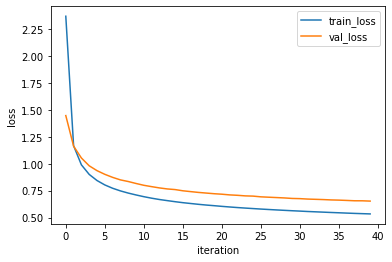

In [ ]:
plt.plot(fc.losses)
plt.plot(fc.val_losses)
plt.ylabel('loss')
plt.xlabel('iteration')
plt.legend(['train_loss', 'val_loss'])
plt.show()

In [ ]:
fc.score(val_data, val_target_encoded)

0.8150833333333334